FISTA CBPDN Solver
==================

This example demonstrates the use of a FISTA solver for a convolutional sparse coding problem with a greyscale signal [[9]](http://sporco.rtfd.org/en/latest/zreferences.html#chalasani-2013-fast) [[37]](http://sporco.rtfd.org/en/latest/zreferences.html#wohlberg-2016-efficient)

  $$\mathrm{argmin}_\mathbf{x} \; \frac{1}{2} \left\| \sum_m \mathbf{d}_m * \mathbf{x}_{m} - \mathbf{s} \right\|_2^2 + \lambda \sum_m \| \mathbf{x}_{m} \|_1 \;,$$

where $\mathbf{d}_{m}$ is the $m^{\text{th}}$ dictionary filter, $\mathbf{x}_{m}$ is the coefficient map corresponding to the $m^{\text{th}}$ dictionary filter, and $\mathbf{s}$ is the input image.

In [1]:
from __future__ import print_function
from builtins import input
from builtins import range

import pyfftw   # See https://github.com/pyFFTW/pyFFTW/issues/40
import numpy as np

from sporco import util
from sporco import plot
plot.config_notebook_plotting()
import sporco.metric as sm
from sporco.fista import cbpdn

Load example image.

In [2]:
img = util.ExampleImages().image('barbara.png', scaled=True, gray=True,
                                 idxexp=np.s_[10:522, 100:612])

Highpass filter example image.

In [3]:
npd = 16
fltlmbd = 10
sl, sh = util.tikhonov_filter(img, fltlmbd, npd)

Load dictionary and display it.

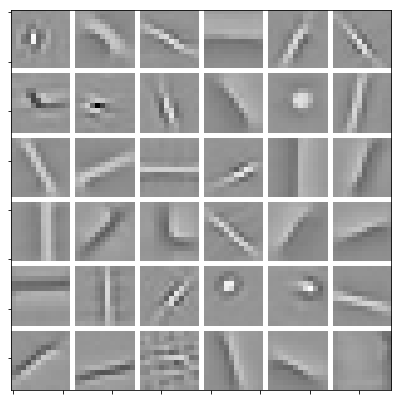

In [4]:
D = util.convdicts()['G:12x12x36']
plot.imview(util.tiledict(D), fgsz=(7, 7))

Set [fista.cbpdn.ConvBPDN](http://sporco.rtfd.org/en/latest/modules/sporco.fista.cbpdn.html#sporco.fista.cbpdn.ConvBPDN) solver options.

In [5]:
lmbda = 5e-2
L = 1e2
opt = cbpdn.ConvBPDN.Options({'Verbose': True, 'MaxMainIter': 250,
            'RelStopTol': 5e-3, 'L': L, 'BackTrack': {'Enabled': True }})

Initialise and run CSC solver.

In [6]:
b = cbpdn.ConvBPDN(D, sh, lmbda, opt, dimK=0)
X = b.solve()
print("ConvBPDN solve time: %.2fs" % b.timer.elapsed('solve'))

Itn   Fnc       DFid      Regℓ1     Rsdl      F         Q         It_Bt  L       
---------------------------------------------------------------------------------


   0  4.42e+02  3.08e+02  2.66e+03  5.44e+00  4.05e+07  4.38e+07      2  1.20e+02


   1  3.58e+02  2.21e+02  2.74e+03  8.94e-01  2.90e+07  3.23e+07      1  1.20e+02


   2  3.09e+02  1.52e+02  3.15e+03  4.20e-01  2.00e+07  2.14e+07      1  1.20e+02


   3  2.79e+02  1.14e+02  3.29e+03  1.93e-01  1.50e+07  1.58e+07      1  1.20e+02


   4  2.58e+02  8.71e+01  3.43e+03  1.07e-01  1.14e+07  1.19e+07      1  1.20e+02


   5  2.45e+02  7.10e+01  3.47e+03  6.94e-02  9.34e+06  9.63e+06      1  1.20e+02


   6  2.35e+02  5.99e+01  3.49e+03  4.99e-02  7.88e+06  8.08e+06      1  1.20e+02


   7  2.27e+02  5.29e+01  3.48e+03  3.92e-02  6.96e+06  7.12e+06      1  1.20e+02


   8  2.21e+02  4.78e+01  3.47e+03  3.17e-02  6.29e+06  6.42e+06      1  1.20e+02


   9  2.16e+02  4.44e+01  3.43e+03  2.60e-02  5.85e+06  5.97e+06      1  1.20e+02


  10  2.12e+02  4.18e+01  3.40e+03  2.11e-02  5.50e+06  5.61e+06      1  1.20e+02


  11  2.08e+02  4.00e+01  3.37e+03  1.71e-02  5.27e+06  5.37e+06      1  1.20e+02


  12  2.05e+02  3.85e+01  3.33e+03  1.36e-02  5.07e+06  5.16e+06      1  1.20e+02


  13  2.02e+02  3.74e+01  3.30e+03  1.12e-02  4.93e+06  5.01e+06      1  1.20e+02


  14  2.00e+02  3.65e+01  3.27e+03  9.63e-03  4.81e+06  4.88e+06      1  1.20e+02


  15  1.98e+02  3.58e+01  3.24e+03  8.54e-03  4.71e+06  4.78e+06      1  1.20e+02


  16  1.96e+02  3.51e+01  3.21e+03  7.69e-03  4.63e+06  4.69e+06      1  1.20e+02


  17  1.94e+02  3.46e+01  3.18e+03  7.01e-03  4.56e+06  4.61e+06      1  1.20e+02


  18  1.92e+02  3.41e+01  3.16e+03  6.36e-03  4.50e+06  4.55e+06      1  1.20e+02


  19  1.91e+02  3.37e+01  3.14e+03  5.77e-03  4.44e+06  4.49e+06      1  1.20e+02


  20  1.89e+02  3.34e+01  3.12e+03  5.30e-03  4.40e+06  4.44e+06      1  1.20e+02


  21  1.88e+02  3.31e+01  3.10e+03  4.88e-03  4.35e+06  4.39e+06      1  1.20e+02
---------------------------------------------------------------------------------
ConvBPDN solve time: 16.34s


Reconstruct image from sparse representation.

In [7]:
shr = b.reconstruct().squeeze()
imgr = sl + shr
print("Reconstruction PSNR: %.2fdB\n" % sm.psnr(img, imgr))

Reconstruction PSNR: 35.11dB



Display low pass component and sum of absolute values of coefficient maps of highpass component.

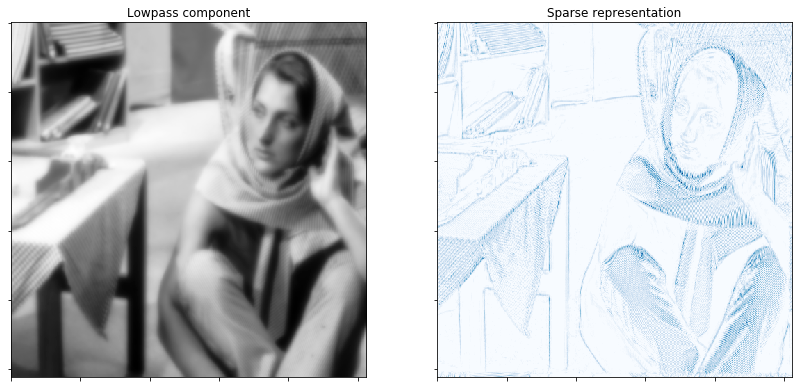

In [8]:
fig = plot.figure(figsize=(14, 7))
plot.subplot(1, 2, 1)
plot.imview(sl, title='Lowpass component', fig=fig)
plot.subplot(1, 2, 2)
plot.imview(np.sum(abs(X), axis=b.cri.axisM).squeeze(), cmap=plot.cm.Blues,
            title='Sparse representation', fig=fig)
fig.show()

Display original and reconstructed images.

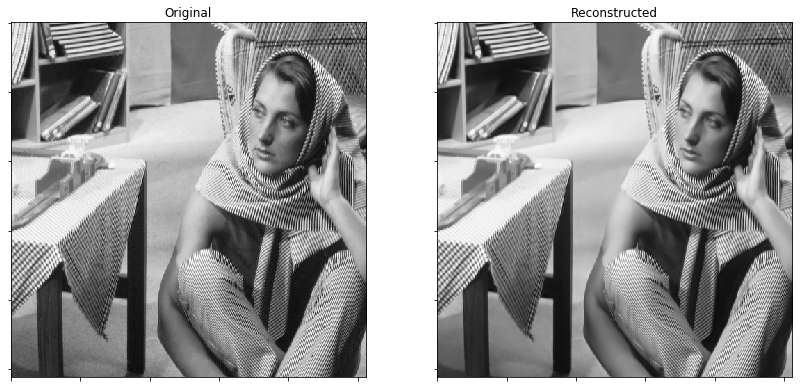

In [9]:
fig = plot.figure(figsize=(14, 7))
plot.subplot(1, 2, 1)
plot.imview(img, title='Original', fig=fig)
plot.subplot(1, 2, 2)
plot.imview(imgr, title='Reconstructed', fig=fig)
fig.show()

Get iterations statistics from solver object and plot functional value, ADMM primary and dual residuals, and automatically adjusted ADMM penalty parameter against the iteration number.

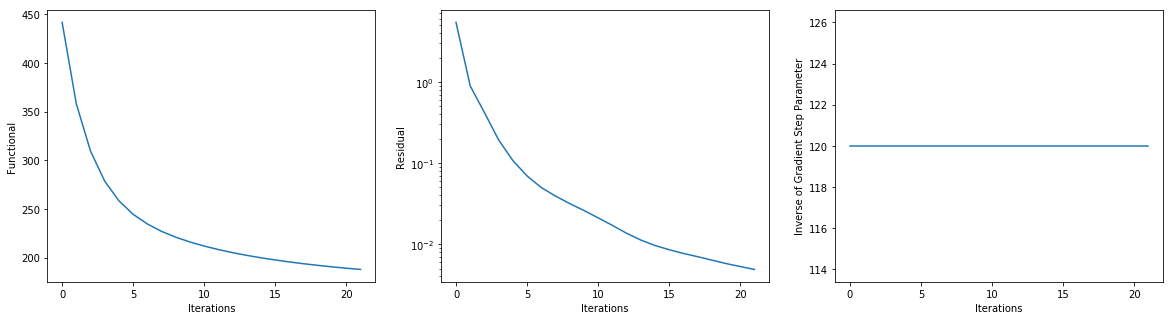

In [10]:
its = b.getitstat()
fig = plot.figure(figsize=(20, 5))
plot.subplot(1, 3, 1)
plot.plot(its.ObjFun, xlbl='Iterations', ylbl='Functional', fig=fig)
plot.subplot(1, 3, 2)
plot.plot(its.Rsdl, ptyp='semilogy', xlbl='Iterations', ylbl='Residual',
          fig=fig)
plot.subplot(1, 3, 3)
plot.plot(its.L, xlbl='Iterations',
          ylbl='Inverse of Gradient Step Parameter', fig=fig)
fig.show()